Schrödinger Equation Solver: Larmor precession

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz

%matplotlib inline

#Bloch es para visualización, QobjEvo es para setuppear objetos cuánticos 
#dependientes del tiempo y sesolve es un solver de la Ec de Schrödinger

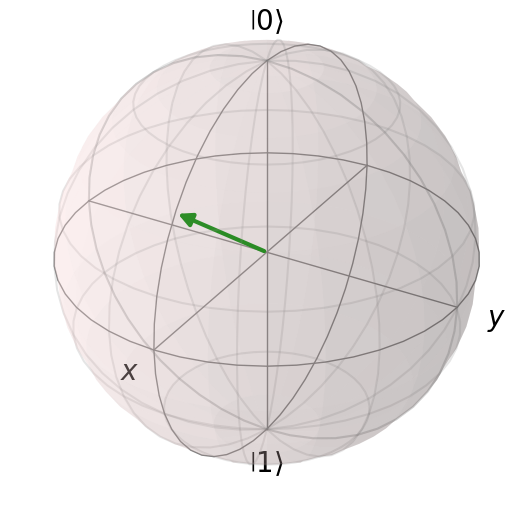

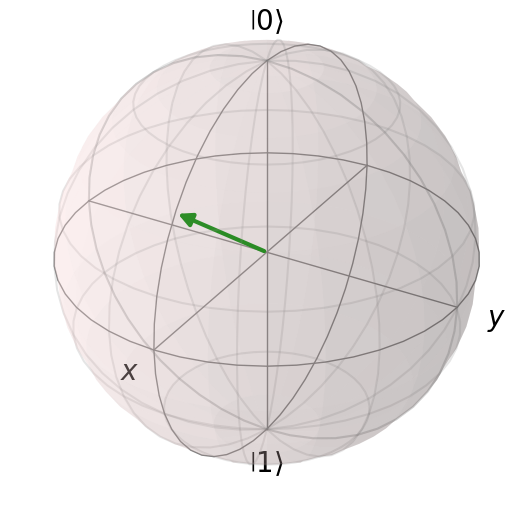

In [7]:
psi = (2.0*basis(2,0) + basis(2,1)).unit() #unit() normaliza el estado cuántico
b = Bloch()
b.add_states(psi)
b.show()

### ***Campo magnético constante***
Le enchufo un campo magnético en la dirección z, el hamiltoniano es una constante por la martiz sigmaz() de pauli

In [ ]:
H = sigmaz()
temp = np.linspace(0,10,100)
result = sesolve(H,psi,temp,[sigmay()]) #Guarda el valor esperado de sigmay() y lo guarda en resul.expect()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lande\AppData\Local\Temp\ipykernel_18096\742388291.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("<$\sigma _y$>")


Text(0, 0.5, '<$\\sigma _y$>')

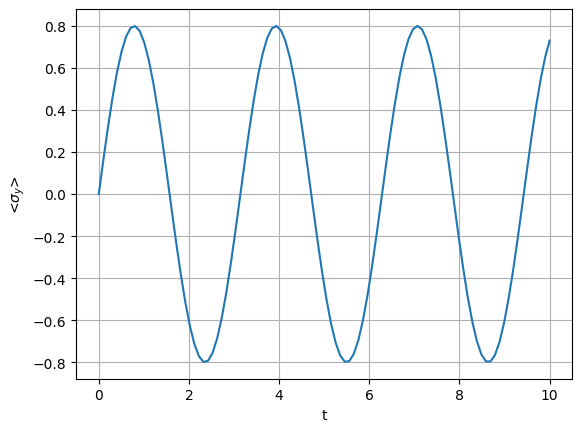

In [11]:
plt.plot(temp,result.expect[0])
plt.grid()
plt.xlabel("t")
plt.ylabel("<$\sigma _y$>")

c:\Users\lande\AppData\Local\Programs\Python\Python312\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


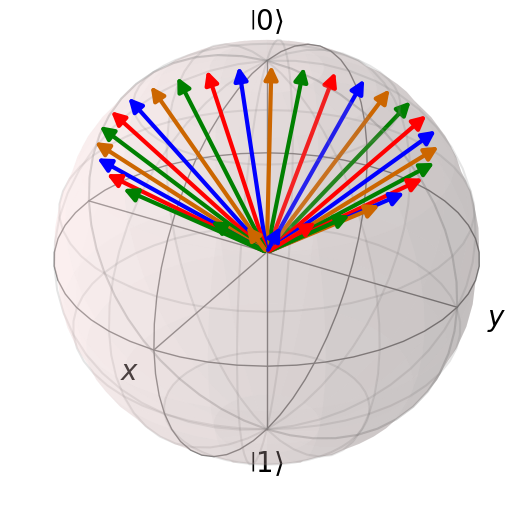

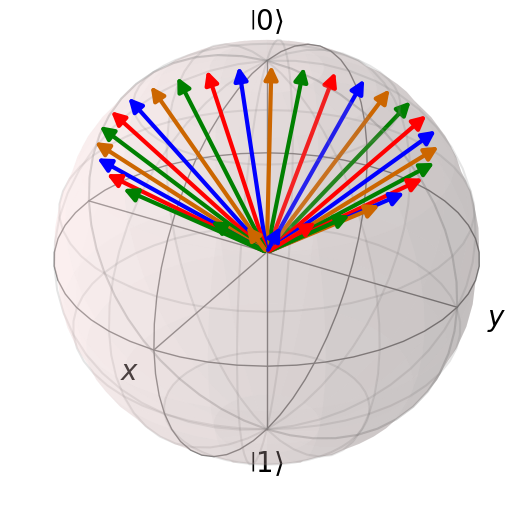

In [16]:
res = sesolve(H,psi,temp,[])
b1 = Bloch()
b1.add_states(res.states[1:30])
b1.show()

### ***Si el campo varía con el tiempo***
Lo hago lineal, algo es algo. Tampoco costaría demasiado que fuese senoidal

In [26]:
def linear(t,args):
    return 0.3*t

H_lin = QobjEvo([[sigmaz(),linear]],tlist=temp) #Hay que poner tlist =, o no va. Estos objetos no tienen atributos eigenvectors y eigenenergies

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lande\AppData\Local\Temp\ipykernel_18096\3663714473.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("<$\sigma _y$>")


Text(0, 0.5, '<$\\sigma _y$>')

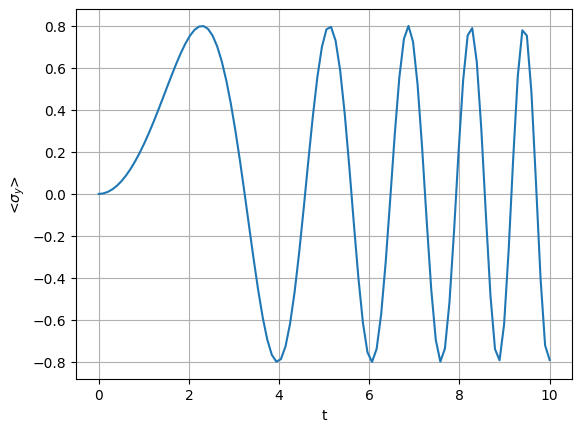

In [28]:
result = sesolve(H_lin,psi,temp,[sigmay()])
plt.plot(temp,result.expect[0])
plt.grid()
plt.xlabel("t")
plt.ylabel("<$\sigma _y$>")

La frecuencia varía con el tiempo. Igual haría falta más puntos, pero está bien